In [870]:
import pandas as pd
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
import tensorflow as tf
from sklearn.metrics import classification_report

In [938]:
#DECLARE CONSTANTS
IMG_HEIGHT = 28
IMG_WIDTH = 28
NUM_FILES = 1000
N_EPOCHS = 20
RANDOM_SEED = 42

In [926]:
#GETTING ALL FILE NAMES
data_files = os.listdir('./data/')
data_files = [f'./data/{file}' for file in data_files]
data_files.remove('./data/.DS_Store')
N_CATEGORIES = len(data_files)

In [927]:
#POPULATING TOTAL X AND Y
all_drawings = []
all_categories = []

for idx, file in enumerate(data_files):
    data = np.load(file)[:NUM_FILES]
    for d in data:
        reshaped_img = np.array(np.reshape(d, (-1, 28))).astype(np.float32)
        
        all_drawings.append(reshaped_img)
        all_categories.append(idx)

all_drawings = np.array(all_drawings)

all_categories = np.array(all_categories)

In [928]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(all_drawings, all_categories, test_size=0.2, random_state=RANDOM_SEED)

In [929]:
slice_index = int(len(X_train_full)*0.8)

X_train = X_train_full[:slice_index][..., np.newaxis]
X_valid = X_train_full[slice_index:][..., np.newaxis]

y_train = y_train_full[:slice_index][..., np.newaxis]
y_valid = y_train_full[slice_index:][..., np.newaxis]

X_test = X_test[..., np.newaxis]

In [930]:
model = keras.models.Sequential([
    Conv2D(filters=8, kernel_size=3,padding="same", activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,1)),
    MaxPool2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),

#     Conv2D(filters=16, kernel_size=4, padding="same", activation="relu"),
#     MaxPool2D(pool_size=2),
    
    Flatten(),
    Dropout(0.5, seed=RANDOM_SEED),
    Dense(units=784,activation="relu"),
    Dense(units=N_CATEGORIES, activation="softmax"),
])

In [937]:
model.compile(optimizer="adam", loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [939]:
history = model.fit(X_train,y_train,epochs = N_EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/20
120/120 [==============================] - 5s 39ms/step - loss: 0.3009 - accuracy: 0.9510 - val_loss: 1.0949 - val_accuracy: 0.8875
Epoch 2/20
120/120 [==============================] - 3s 22ms/step - loss: 0.2367 - accuracy: 0.9503 - val_loss: 1.3507 - val_accuracy: 0.8917
Epoch 3/20
120/120 [==============================] - 3s 24ms/step - loss: 0.1946 - accuracy: 0.9591 - val_loss: 1.1475 - val_accuracy: 0.8854
Epoch 4/20
120/120 [==============================] - 3s 25ms/step - loss: 0.1997 - accuracy: 0.9573 - val_loss: 1.1004 - val_accuracy: 0.8875
Epoch 5/20
 60/120 [==============>...............] - ETA: 1s - loss: 0.1240 - accuracy: 0.9630

KeyboardInterrupt: 

In [933]:
score = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

38/38 [==============================] - 0s 6ms/step - loss: 1.7923 - accuracy: 0.8942


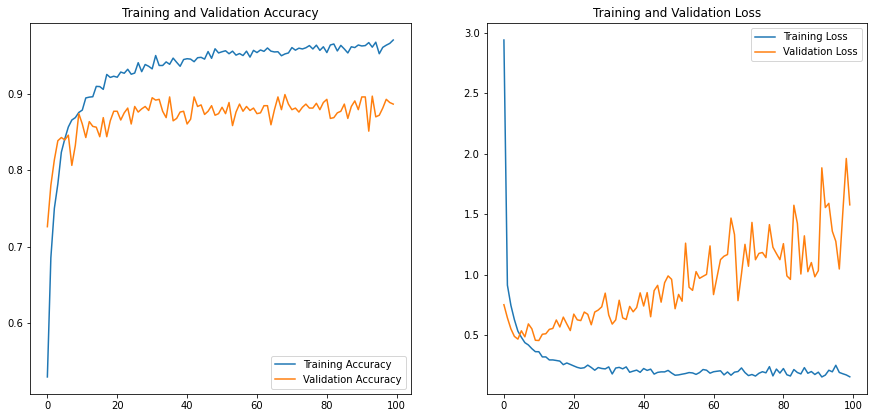

In [934]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(N_EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [935]:
predictions = model.predict_classes(X_valid)

print(classification_report(y_valid, predictions, target_names = data_files)) 

                                          precision    recall  f1-score   support

  ./data/full_numpy_bitmap_ambulance.npy       0.89      0.92      0.90       147
      ./data/full_numpy_bitmap_angel.npy       0.93      0.81      0.87       156
./data/full_numpy_bitmap_alarm clock.npy       0.91      0.74      0.82       164
        ./data/full_numpy_bitmap_axe.npy       0.90      0.93      0.91       157
      ./data/full_numpy_bitmap_apple.npy       0.88      0.97      0.92       164
   ./data/full_numpy_bitmap_airplane.npy       0.84      0.95      0.89       172

                                accuracy                           0.89       960
                               macro avg       0.89      0.89      0.89       960
                            weighted avg       0.89      0.89      0.88       960



In [796]:
from keras import backend as K

inp = model.input
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp], [out]) for out in outputs]

# Testing
test = np.random.random((28, 28, 1))[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
for layer in layer_outs:
    for l in layer:
        print(l.shape)
#         if len(l.shape) < 4:
#             continue
#         for img in l[:, :, :, :]:
#             print(img[:, :, 0].shape)
# #         for img in l:
# #             print(l[:, :, 0].shape)
#             plt.imshow(img[:, :, 0])
#             plt.show()
#             plt.imshow(img[:, :, 1])
#             plt.show()
#             plt.imshow(img[:, :, 2])
#             plt.show()
#             plt.imshow(img[:, :, 3])
#             plt.show()
#             plt.imshow(img[:, :, 4])
#             plt.show()
#             plt.imshow(img[:, :, 5])
#             plt.show()
#             plt.imshow(img[:, :, 6])
#             plt.show()
#             plt.imshow(img[:, :, 7])
#             plt.show()
# #         plt.imshow(l)
# #         plt.show()

(1, 28, 28, 8)
(1, 14, 14, 8)
(1, 14, 14, 16)
(1, 7, 7, 16)
(1, 7, 7, 16)
(1, 784)
(1, 784)
(1, 7)


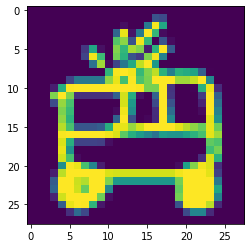

(28, 28, 1, 2)


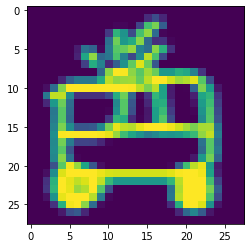

In [795]:
x_in = all_drawings[0]

plt.imshow(x_in)
plt.show()

kernel_in = np.array([
 [ [[1, 0]], [[1, 0]] ],
 [ [[1, 0]],[[1,0]] ], ])

x = tf.constant(x_in[..., np.newaxis][..., np.newaxis], dtype=tf.int32)

kernel = tf.constant(kernel_in, dtype=tf.int32)

print(out.shape)

out = tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='SAME')

plt.imshow(out[:, :, :, 0])
plt.show()